In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(6,4)})

In [29]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [31]:
confirmed[confirmed["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,442,568,572,643,904,1076,1014,1376,1524,1793
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,328,421,525,732,967,1706,2495,5365,8310,11710
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,221,282,340,426,557,698,751,952,1177,1364
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,108,123,138,164,197,218,218,328,413,525
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,46,47,47,47,47,49,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,5,6,12,29,39,46,78,83,131
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,3,5,5,5,5,5,14,21
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,3,3,3,5,12,14,15


In [4]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,10,10,15,16,19,22,22,27,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [32]:
recovered[recovered["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,6,6,6,6,6,6,0,0,0,0
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
confirmed["Country/Region"].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [10]:
# create a time series data
def prepare_data(case):
    """
    case:
        pandas data frame for either confirmed/deaths/recovered
    """
    # select only the columns with time
    case_T = case[case.columns[-54:]].T 

     # set columns names to Country/Region
    case_T.columns = case["Country/Region"]

    # transform index to datetime
    case_T.index = pd.to_datetime(case_T.index) 

    # sum data of regions in the same country
    regions_count = pd.value_counts(confirmed["Country/Region"]).reset_index()
    regions_count.columns = ["Country/Region","Counts"]
    to_drop = list(regions_count[regions_count["Counts"]>1]["Country/Region"].values)
    case_T_copy = case_T.copy()
    case_T_copy = case_T_copy.drop(to_drop, axis=1)
    for i in to_drop:
        case_T_copy[i] = case_T[i].sum(axis=1)
    
    return case_T_copy

In [12]:
confirmed_prepared = prepare_data(confirmed)
deaths_prepared = prepare_data(deaths)
recovered_prepared = prepare_data(recovered)

In [21]:
recovered_prepared["US"].sum()

249

In [13]:
sum_confirmed  = confirmed_prepared.tail(1).sum(axis=1)
sum_deaths  = deaths_prepared.tail(1).sum(axis=1)
sum_recovered  = recovered_prepared.tail(1).sum(axis=1)
print(sum_confirmed[0]), print(sum_deaths), print(sum_recovered)

304524
2020-03-21    12973
dtype: int64
2020-03-21    91499
dtype: int64


(None, None, None)

In [14]:
#  filter data by country
def filter_by_country(country):
    country_all  = pd.DataFrame(
        data=
            confirmed_prepared[country].values,
        columns = [
            "Confirmed",
        ],
        index=confirmed_prepared.index
    )

    country_all["Deaths"] = deaths_prepared[country].values
    country_all["Recovered"] = recovered_prepared[country].values
    country_all.index = pd.to_datetime(country_all.index)

    return country_all

In [26]:
# plotting a trend of cases
def plot_cases(country):
    country_cases = filter_by_country(country)

    # number of cases
    confirmed = country_cases["Confirmed"].sum()
    deaths = country_cases["Deaths"].sum(axis=1)
    recovered = country_cases["Recovered"].sum()
    print("Confirmed: ", confirmed)
    print("Deaths: ", deaths)
    print("Recovered: ", recovered)
    print("Death Rate: {}".format(np.round((deaths/confirmed)*100, 1)))
    print("Recovery Rate: {}".format(np.round((recovered/confirmed)*100, 1)))
    country_cases.plot(
        title="Covid-19 Cases for {}".format(country),
        )
    plt.ylabel("# of cases")
    plt.show()
    return 

Confirmed:  305
Deaths:  3
Recovered:  0
Death Rate: 1.0
Recovery Rate: 0.0


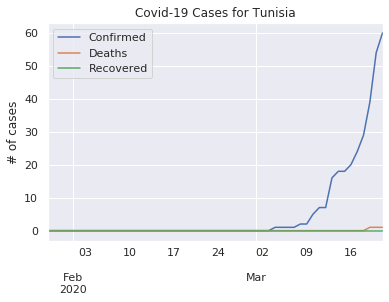

In [23]:
plot_cases("Tunisia")